This is the code for Assignment 2 of CS5783

Upload train and test file before running the code

In [1]:
# import needed library
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# code refered from 'BackProp_Demo.ipynb'
# used in both questions

# Define sigmoid activation function
def sigmoid(z):
	return 1/(1 + np.exp(-z))
 
 # derivation of sigmoid function
def sigmoid_derivative(z):
  return sigmoid(z)*(1-sigmoid(z))
  

#Question 1
Assume x is the input variable(total m samples) and y is the output. Initial the weights and bias of the hidden layers (W1, b1) and the output layer (W2, b2). There will be linear activation function for the output layer as it is regression. The activation function for the hidden layer g is a sigmoid function g. 
g(z) = 1/(1+ exp^(-z))
g’(z) = g(z)*(1-g(z))


The forward pass of the neural network will be:
 
z1 = np.dot(W1.T, x) + b1    
a1 = g(z1)  

y_hat = np.dot(W2.T, a1) + b2

### The loss function when using the Mean Square Error loss is: 
loss = sum((y_hat - y)^2)/len(y) 
### Let lr is the learning rate, the update rule for the weights and bias of the two layers are:
W2 := W2 - lr*(y_hat - y)*a1   
d2 := d2 - lr*(y_hat - y)   
W1 := W1 - lr*(y_hat - y)*w2 *g’(z1)*x   
d1 := d1 - lr*(y_hat - y)*w2 *g’(z1)   

## Difference from the update rule between binary classification using log loss and MSE loss for regression. 
The update rule for the Weights and Bias of the two layers are the same for binary classification using log loss and regression using the MSE loss. 
But their forward passes are different. The binary classification has a sigmoid activation function for the output layer. Linear activation function for the output layer in regress.



In [3]:
# refers the code from 'BackProp_Demo.ipynb'
# train the neural network

# Define input
# The input of x has two features
x = np.random.uniform(0,1,(2,1))
y = np.random.randint(1, 2)
# Define initial parameters
# The hidden layer has 2 neurons, ans output layer has one nueron
W1 = np.random.rand(2,2)
b1 = np.random.rand(2,1)
W2 = np.random.rand(1,2)
b2 = np.random.rand(1,1)


In [4]:
# The forward pass of the neural network
z1 = np.dot(W1, x) + b1    
a1 = sigmoid(z1)

y_hat_ori = np.dot(W2, a1) + b2

print(y_hat_ori- y)

[[0.90494871]]


In [5]:
lr = 0.1 #learning rate

# error between predict and truth is :
dy = y_hat_ori - y

# The gradient for W2, b2, W1, b1 are :
dW2 = np.dot(dy, a1.T)
db2 = dy
dz1 = np.dot(W2.T, dy) * sigmoid_derivative(z1)
dW1 = np.dot(dz1, x.T)
db1 = dz1

# Update rule:
W1 = W1 - lr*dW1
W2 = W2 - lr*dW2
b1 = b1 - lr*db1
b2 = b2 - lr*db2


In [6]:

iter= 45 #iteration number of learning

# Backpropagation for regression
def backprop(W1, W2, b1, b2):

  for i in range(iter):

    # forward the pass 
    z1 = np.dot(W1, x) + b1
    a1 = sigmoid(z1)
    y_hat = np.dot(W2, a1) + b2    

    # error between predict and truth is :
    dy = y_hat - y

    # The gradient for W2, b2, W1, b1 are :
    dW2 = np.dot(dy, a1.T)
    db2 = dy
    dz1 = np.dot(W2.T, dy) * sigmoid_derivative(z1)
    dW1 = np.dot(dz1, x.T)
    db1 = dz1

    # Update rule:
    W1 = W1 - lr*dW1
    W2 = W2 - lr*dW2
    b1 = b1 - lr*db1
    b2 = b2 - lr*db2

    # Update the rule 
#    z1New = np.dot(W1, x) + b1
#    a1New = sigmoid(z1New)
#    y_hat = np.dot(W2, a1New) + b2


    print(y_hat_ori,y_hat)

#Train the nueral network with backpropagation for regression using the MSE loss
backprop(W1, W2, b1, b2)

[[1.90494871]] [[1.67753508]]
[[1.90494871]] [[1.50794985]]
[[1.90494871]] [[1.38114549]]
[[1.90494871]] [[1.28616336]]
[[1.90494871]] [[1.21493567]]
[[1.90494871]] [[1.16148071]]
[[1.90494871]] [[1.12134306]]
[[1.90494871]] [[1.09119424]]
[[1.90494871]] [[1.06854275]]
[[1.90494871]] [[1.05152119]]
[[1.90494871]] [[1.03872864]]
[[1.90494871]] [[1.02911352]]
[[1.90494871]] [[1.02188614]]
[[1.90494871]] [[1.01645328]]
[[1.90494871]] [[1.01236923]]
[[1.90494871]] [[1.00929903]]
[[1.90494871]] [[1.00699095]]
[[1.90494871]] [[1.00525578]]
[[1.90494871]] [[1.00395131]]
[[1.90494871]] [[1.00297061]]
[[1.90494871]] [[1.00223332]]
[[1.90494871]] [[1.00167903]]
[[1.90494871]] [[1.00126231]]
[[1.90494871]] [[1.00094902]]
[[1.90494871]] [[1.00071348]]
[[1.90494871]] [[1.0005364]]
[[1.90494871]] [[1.00040327]]
[[1.90494871]] [[1.00030319]]
[[1.90494871]] [[1.00022794]]
[[1.90494871]] [[1.00017137]]
[[1.90494871]] [[1.00012884]]
[[1.90494871]] [[1.00009686]]
[[1.90494871]] [[1.00007282]]
[[1.9049487

## Question 2 
1. I choose linear any activation function for the output layer as it is a regression task. For regression task, the output layer has a linear relationship with the repiction.
2. 1 newron in the output layer. Because there is one output result y needed for each input sample x in the newral network.
3. I use The coefficient of determination- R^2 as the accuracy. R^2 is a measure that provides information about the goodness of the regression to the truth data. I choose 5 hidden neurons for the 2-layer neural network. Then I  trained the neural network with a learning rate of 0.002, iteration(epoch) of 300. The average MSE during training is around 208.69, and the average accuracy is 0.964. The MSE of the last iteration(300th) is 13.3 and the accuracy is 0.998.    
###Then I used the test data to test the neural network.The  MSE and accuracy for the test data are  99.79 and 0.982 respectively. 99.432202921264 0.9818567897388544
(Printed the MSE and accuracy in the code, the value may slighly different with if the neural network was re-trained)
4. Plotted in the code(below). 
5. I tested the effect of learning rate in the training of neural network. I used iteration = 100. Overall, the accuracy getting lower along with the learning rate getting higher. But there is a wave when learning rate is too high. This is because the unstable of the training when learning rate is too high. During the variation of the learning rate, I found that the learning rate is little, the training loss keeping decreasing along with the iteration. But when the learning rate is large, the training loss may jump to higher or lower along with the iteration. Which means the training is not stable.  When the training loss can keep decreasing along with the iteration, the higher the learning rate is, the faster it get converge. 
6. a. The update rule doesn't need to be changed.  The update rule is not affected by number of neurons. It is affected by the number of layers and the activation function of each layer. 
b. Overall, the more neurons, the better prediction. when number of neuron change from 1 to 5, the accuracy is getting higher along with the neuron number increase. But after neuron>5, the promotion of the accuracy is not obvious anymore.  
7. a. Yes, we need to change the update rule beacuse the derivative of different activation function is different.
b. both the forward pass and backpropagation need to be changed to achieve this experiment. The forward pass needs to use new activation function, the backpropagation need to use new derivative of the activation function.
c. The tanh and linear don't work well on this problem. The training loss look great for both tanh and linear activation function, but the test result has large loss. The test final loss is 5458 for tanh and  4660 for linear. However, from the comparison of true data and predicted data, we can see that tanh work better than linear. 

In [7]:
# function used to calculate MSE loss
def mseLoss(y_hat, y):

  loss = np.sum((y_hat- y)**2)/len(y)
 
  return loss

In [8]:
# function used to calculate accuracy r2
def accuracy_r2(y_hat, y):
  y_bar = np.mean(y)
  t1 = np.sum((y - y_hat)**2)
  t2 = np.sum((y - y_bar)**2)

  accuracy = 1 - t1/t2
 
  return accuracy

In [9]:
# forward pass function
def forward(x, W1, W2, b1, b2):

  # The forward pass of the neural network
  z1 = np.dot(W1, x.T) + b1    
  a1 = sigmoid(z1)

  y_hat = np.dot(W2, a1) + b2

  return (y_hat, z1, a1)

In [10]:
#backpropagate through Stochastic Gradient descent to update weights and bias 
#use MSE loss to train the data with Stochastic 
def backward_MSE_Stochastic(X_train,Y_train,W1, W2, b1, b2,lr,iter):
  MSE = []
  Accura = []
  
  n = len(Y_train)
  #use MSE to train the data
  #the output of hidden layer is :
  for j in range(iter):
    Y_fit = []
    for i in range(n):

      y = Y_train[i]
      x = X_train[i]

      x = np.reshape(x,(-1,1))

      # The forward pass of the neural network
      z1 = np.dot(W1, x) + b1    
      a1 = sigmoid(z1)

      y_hat = np.dot(W2, a1) + b2

      #print(y_hat,z1, a1 )
      Y_fit.append(y_hat)
      # error between predict and truth is :
      dy = y_hat - y

      # The gradient for W2, b2, W1, b1 are :
      dW2 = np.dot(dy, a1.T)
      db2 = dy
      dz1 = np.dot(W2.T, dy) * sigmoid_derivative(z1)
      dW1 = np.dot(dz1, x.T)
      db1 = dz1

      # Update rule:
      W1 = W1 - lr*dW1
      W2 = W2 - lr*dW2
      b1 = b1 - lr*db1
      b2 = b2 - lr*db2

    Yfit = np.reshape(np.array(Y_fit), n)
    #calculate mse  
    mse = mseLoss(Yfit, Y_train)
    MSE.append(mse)

    #use absolute error to indicate accuracy
    #accuracy = (abs(np.reshape(np.array(Y_fit), n)-Y_train))
    accuracy = accuracy_r2(Yfit, Y_train)
    Accura.append(np.mean(accuracy))

  return MSE, Accura, W1, W2, b1, b2



In [11]:
#backpropagate through Batch Gradient Descent to update weights and bias 
#use MSE to train the data with batch 
def backward_MSE_Batch(x,y,W1, W2, b1, b2,lr,iter):
  MSE = []
  Accura = []

  for j in range(iter):

  # The forward pass of the neural network
    y_hat,z1, a1 = forward(x, W1, W2, b1, b2)

  # error between predict and truth is :
    dy = y_hat - y
    dy_mean = np.mean(dy, axis=1)

    # The gradient for W2, b2, W1, b1 are :
    # The gradient for W2, b2, W1, b1 are :
    dW2 = np.dot(dy, a1.T)
    db2 = np.reshape(dy_mean,(1,1))
    dz1 = np.dot(W2.T, dy) * sigmoid_derivative(z1)
    dW1 = np.dot(dz1, X_train)
    db1 = np.reshape(np.mean(dz1, axis=1),(h1,1))

    # Update rule:
    W1 = W1 - lr*dW1
    W2 = W2 - lr*dW2
    b1 = b1 - lr*db1
    b2 = b2 - lr*db2

    #calculate mse  
    mse = mseLoss(y_hat, y)
    MSE.append(mse)

    #use absolute error to indicate accuracy
    accuracy = accuracy_r2(y_hat, y)
    Accura.append(np.mean(accuracy))

  return MSE, Accura, W1, W2, b1, b2


In [12]:
# read training and test data
X_train = np.loadtxt("X_train.csv")
Y_train = np.loadtxt("Y_train.csv")

X_test = np.loadtxt("X_test.csv")
Y_test = np.loadtxt("Y_test.csv")

# training sample number n, and f features of x
n, f = X_train.shape
len_y = len(Y_train)


In [13]:

# define the number of neuron in hidden
h1 = 5

# Define initial parameters
W1 = np.random.rand(h1, f)
b1 = np.random.rand(h1,1)
W2 = np.random.rand(1, h1)
b2 = np.random.rand(1,1)


# call backpropagation to train the network

#learning rate
lr = 0.002
#iteration number of learning 
iter= 300
# call backpropagation to train the network
MSE, Accura, W1, W2, b1, b2 = backward_MSE_Stochastic(X_train,Y_train,W1, W2, b1, b2,lr,iter)

#print mean MSE and accuracy during training 
print('The average MSE and accuracy during training are: ', np.mean(MSE), np.mean(Accura))
print('The  MSE and accuracy of the last training iteration: ', MSE[iter-1], Accura[iter-1])

The average MSE and accuracy during training are:  208.69513476204781 0.9630773041743665
The  MSE and accuracy of the last training iteration:  13.297690861459186 0.9976473500667815


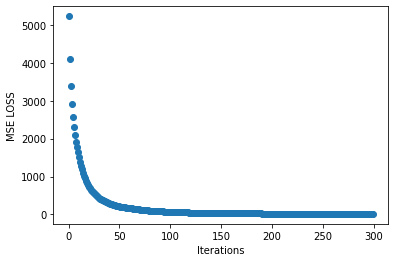

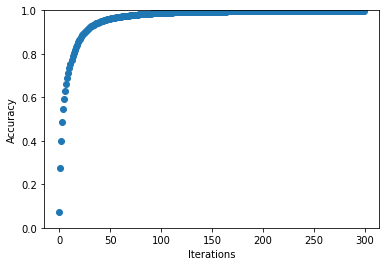

In [14]:

# plot the MSE loss as a function of the number of iterations
plt.scatter(range(iter), MSE)
plt.xlabel("Iterations")
plt.ylabel("MSE LOSS")
plt.show()

#plot the accuracy as a function of the number of iterations
plt.scatter(range(iter), Accura)
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()


In [15]:
#test the neural network
y_hat_test, z1,a1 = forward(X_test, W1, W2, b1, b2)

#calculate average mse
Amse = mseLoss(y_hat_test, Y_test)

#calculate average accuracy r2
Aaccuracey = accuracy_r2(y_hat_test, Y_test)

#print mean MSE and accuracy for the test data 
print('The  MSE and accuracy for the test data are: ', Amse, Aaccuracey)

The  MSE and accuracy for the test data are:  99.79432202921264 0.9818567897388544


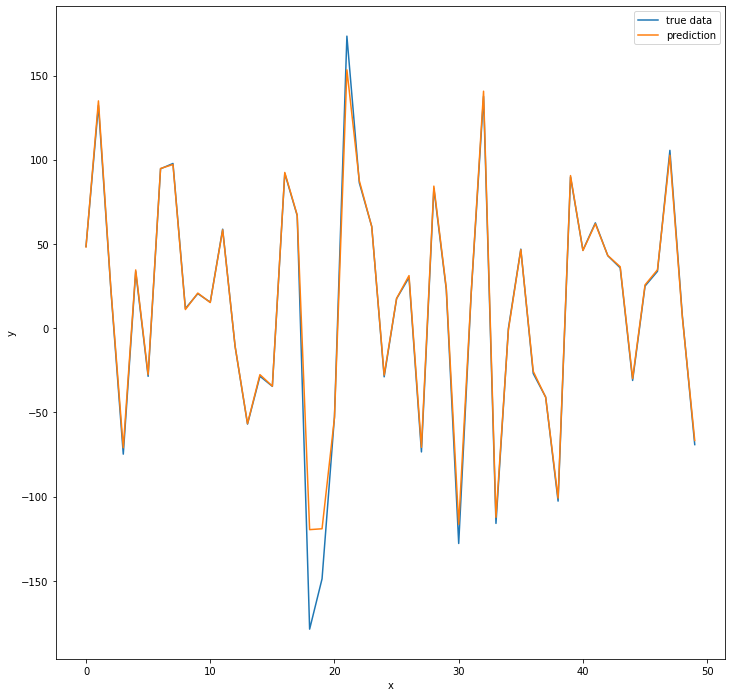

In [16]:

#define figure size
plt.figure(figsize=(12,12)) 
# plot true data
plt.plot(range(len(Y_test)), Y_test, label ='true data')
plt.plot(range(len(Y_test)), y_hat_test[0,:], label = 'prediction')
plt.xlabel("x")
plt.ylabel("y")

plt.legend()
plt.show()

Question 2.5 
5. I tested the effect of learning rate in the training of neural network. I used iteration = 100. Overall, the accuracy getting lower along with the learning rate getting higher. But there is a wave when learning rate is too high. This is because the unstable of the training when learning rate is too high. During the variation of the learning rate, I found that the learning rate is little, the training loss keeping decreasing along with the iteration. But when the learning rate is large, the training loss may jump to higher or lower along with the iteration. Which means the training is not stable.  When the training loss can keep decreasing along with the iteration, the higher the learning rate is, the faster it get converge. 

In [17]:
# define the learning rates used to test the effect
lr_list = np.arange(0.001, 1.0, 0.005)


#iteration number of learning 
iter= 100

MSE_train =[]
Accuracy_train = []

MSE_test =[]
Accuracy_test = []
 #learning rate
for lr in lr_list:

    # Define initial parameters
  W1 = np.random.rand(h1, f)
  b1 = np.random.rand(h1,1)
  W2 = np.random.rand(1, h1)
  b2 = np.random.rand(1,1)


  # call backpropagation to train the network
  MSE, Accura, W1, W2, b1, b2 = backward_MSE_Stochastic(X_train,Y_train,W1, W2, b1, b2,lr,iter)
  MSE_train.append(np.mean(MSE))
  Accuracy_train.append(np.mean(Accura))


  #test the neural network
  y_hat_test, z1,a1 = forward(X_test, W1, W2, b1, b2)
  #calculate average mse
  Amse = mseLoss(y_hat_test, Y_test)
  #calculate average accuracy r2
  Aaccuracey = accuracy_r2(y_hat_test, Y_test)
  #print mean MSE and accuracy for the test data 
  #print('The  MSE and accuracy for the test data are: ', Amse, Aaccuracey)
  MSE_test.append(Amse)
  Accuracy_test.append(Aaccuracey)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


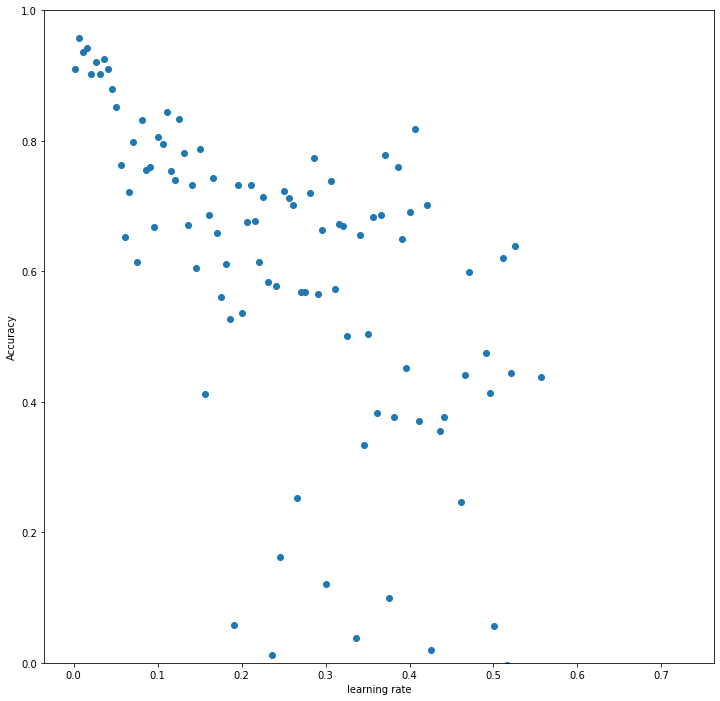

In [18]:

#plot the accuracy of the test data as a function of the learning rate

#define figure size
plt.figure(figsize=(12,12)) 
plt.scatter(lr_list, Accuracy_test)
plt.xlabel("learning rate")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()


Question 2.6  the effect of the number of neurons in the hidden layer


6. a. The update rule doesn't need to be changed.  The update rule is not affected by number of neurons. It is affected by the number of layers and the activation function of each layer. 
b. Overall, the more neurons, the better prediction. when number of neuron change from 1 to 5, the accuracy is getting higher along with the neuron number increase. But after neuron>5, the promotion of the accuracy is not obvious anymore.  


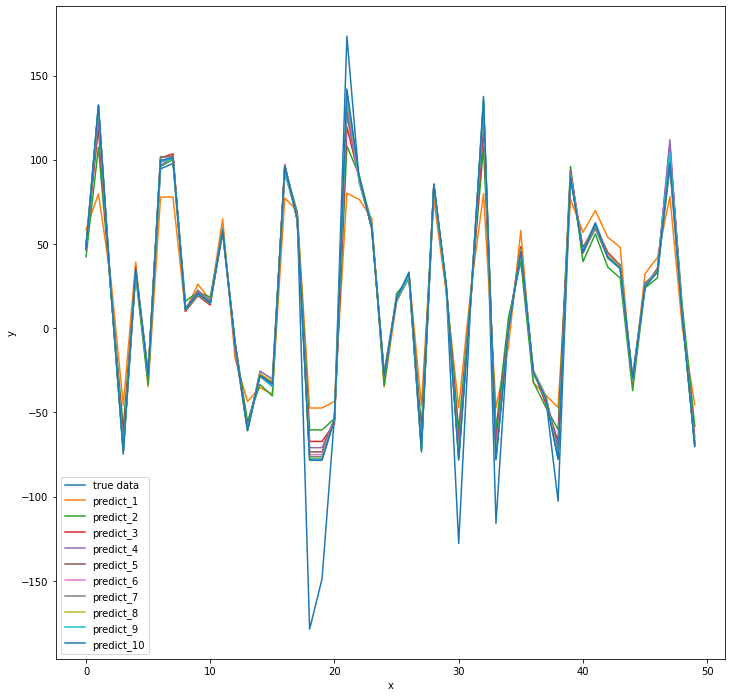

In [19]:
# define the learning rates used to test the effect
lr=0.001

#iteration number of learning 
iter= 100

h1_list = range(10)

#define figure size
plt.figure(figsize=(12,12)) 
# plot true data
plt.plot(range(len(Y_test)), Y_test, label ='true data')

MSE_train =[]
Accuracy_train = []

MSE_test =[]
Accuracy_test = []
 #learning rate
for h1 in h1_list:

  h1 = h1 +1

    # Define initial parameters
  W1 = np.random.rand(h1, f)
  b1 = np.random.rand(h1,1)
  W2 = np.random.rand(1, h1)
  b2 = np.random.rand(1,1)


  # call backpropagation to train the network
  MSE, Accura, W1, W2, b1, b2 = backward_MSE_Stochastic(X_train,Y_train,W1, W2, b1, b2,lr,iter)

  #test the neural network
  y_hat_test, z1,a1 = forward(X_test, W1, W2, b1, b2)
  #calculate average mse
  Amse = mseLoss(y_hat_test, Y_test)
  #calculate average accuracy r2
  Aaccuracey = accuracy_r2(y_hat_test, Y_test)
  #print mean MSE and accuracy for the test data 
  #print('The  MSE and accuracy for the test data are: ', Amse, Aaccuracey)
  MSE_test.append(Amse)
  Accuracy_test.append(Aaccuracey)

  #plot the final loss of the test data as a function of the number of neurons
 #plot the final loss of the test data as a function of the number of neurons
  plt.plot(range(len(Y_test)), y_hat_test[0,:], label = 'predict_{}'.format(h1))

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

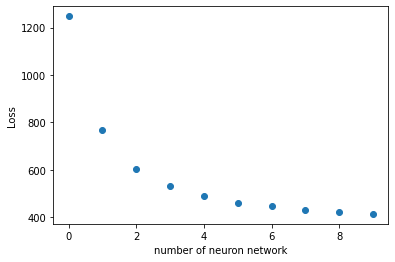

In [20]:
#plot the final loss of the test data as a function of the number of neurons
plt.scatter(h1_list, MSE_test)
plt.xlabel("number of neuron network")
plt.ylabel("Loss")

plt.show()

Question 2.7 the effect of activation functions

7. a. Yes, we need to change the update rule beacuse the derivative of different activation function is different.
b. both the forward pass and backpropagation need to be changed to achieve this experiment. The forward pass needs to use new activation function, the backpropagation need to use new derivative of the activation function.
c. The tanh and linear don't work well on this problem. The training loss look great for both tanh and linear activation function, but the test result has large loss. The test final loss is 5458 for tanh and  4660 for linear. However, from the comparison of true data and predicted data, we can see that tanh work better than linear. 

In [21]:
# use tanh and linear to study the effect of the activate function 

def tanH(x):
  return (2/(1+np.exp(-2*x))-1)

def tanH_derivative(x):
  return 1- ((np.tanh(x))**2)



In [22]:
#backpropagate through Stochastic Gradient descent to update weights and bias 
# the tanh as the activate function
def backward_tanh_Stochastic(X_train,Y_train,W1, W2, b1, b2,lr,iter):
  MSE = []
  Accura = []
  
  n = len(Y_train)
  #use MSE to train the data
  #the output of hidden layer is :
  for j in range(iter):
    Y_fit = []
    for i in range(n):

      y = Y_train[i]
      x = X_train[i]

      x = np.reshape(x,(-1,1))

      # The forward pass of the neural network
      z1 = np.dot(W1, x) + b1    
      a1 = tanH(z1)

      y_hat = np.dot(W2, a1) + b2

      #print(y_hat,z1, a1 )
      Y_fit.append(y_hat)
      # error between predict and truth is :
      dy = y_hat - y

      # The gradient for W2, b2, W1, b1 are :
      dW2 = np.dot(dy, a1.T)
      db2 = dy
      dz1 = np.dot(W2.T, dy) * tanH_derivative(z1)
      dW1 = np.dot(dz1, x.T)
      db1 = dz1

      # Update rule:
      W1 = W1 - lr*dW1
      W2 = W2 - lr*dW2
      b1 = b1 - lr*db1
      b2 = b2 - lr*db2

    Yfit = np.reshape(np.array(Y_fit), n)
    #calculate mse  
    mse = mseLoss(Yfit, Y_train)
    MSE.append(mse)

    #use absolute error to indicate accuracy
    #accuracy = (abs(np.reshape(np.array(Y_fit), n)-Y_train))
    accuracy = accuracy_r2(Yfit, Y_train)
    Accura.append(np.mean(accuracy))

  return MSE, Accura, W1, W2, b1, b2

In [23]:

# define the number of neuron in hidden
h1 = 5

# Define initial parameters
W1 = np.random.rand(h1, f)
b1 = np.random.rand(h1,1)
W2 = np.random.rand(1, h1)
b2 = np.random.rand(1,1)


# call backpropagation to train the network

#learning rate
lr = 0.002
#iteration number of learning 
iter= 200
# call backpropagation to train the network
MSE, Accura, W1, W2, b1, b2 = backward_tanh_Stochastic(X_train,Y_train,W1, W2, b1, b2,lr,iter)

#print mean MSE and accuracy during training 
print('The average MSE and accuracy during training are: ', np.mean(MSE), np.mean(Accura))
print('The  MSE and accuracy of the last training iteration: ', MSE[iter-1], Accura[iter-1])

The average MSE and accuracy during training are:  142.11028859201616 0.9748576076516653
The  MSE and accuracy of the last training iteration:  106.52409586782824 0.981153576990125


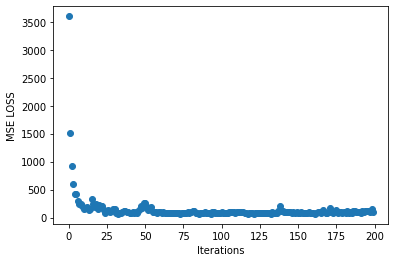

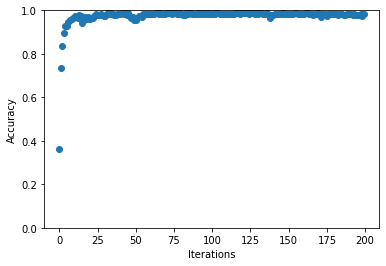

In [24]:

# plot the MSE loss as a function of the number of iterations
plt.scatter(range(iter), MSE)
plt.xlabel("Iterations")
plt.ylabel("MSE LOSS")
plt.show()

#plot the accuracy as a function of the number of iterations
plt.scatter(range(iter), Accura)
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()

In [25]:
#test the neural network
y_hat_test, z1,a1 = forward(X_test, W1, W2, b1, b2)

#calculate average mse
Amse = mseLoss(y_hat_test, Y_test)

#calculate average accuracy r2
Aaccuracey = accuracy_r2(y_hat_test, Y_test)

#print mean MSE and accuracy for the test data 
print('The  MSE and accuracy for the test data are: ', Amse, Aaccuracey)

The  MSE and accuracy for the test data are:  5458.873777026456 0.007543788947703134


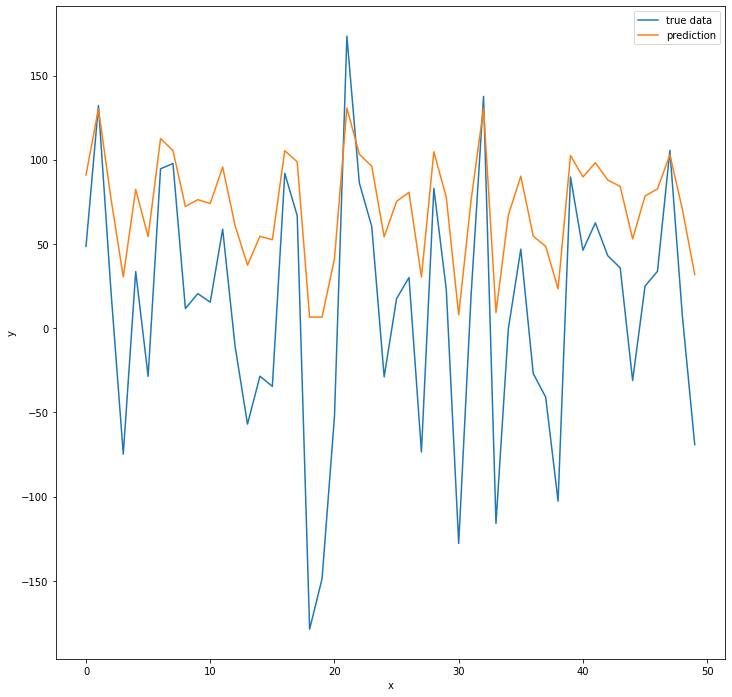

In [26]:

#define figure size
plt.figure(figsize=(12,12)) 
# plot true data
plt.plot(range(len(Y_test)), Y_test, label ='true data')
plt.plot(range(len(Y_test)), y_hat_test[0,:], label = 'prediction')
plt.xlabel("x")
plt.ylabel("y")

plt.legend()
plt.show()

In [27]:
# use  linear to study the effect of the activate function 
def linear(x):
  return x

def linear_derivative(x):
  return 1

In [28]:
#backpropagate through Stochastic Gradient descent to update weights and bias 
# the tanh as the activate function
def backward_linear_Stochastic(X_train,Y_train,W1, W2, b1, b2,lr,iter):
  MSE = []
  Accura = []
  
  n = len(Y_train)
  #use MSE to train the data
  #the output of hidden layer is :
  for j in range(iter):
    Y_fit = []
    for i in range(n):

      y = Y_train[i]
      x = X_train[i]

      x = np.reshape(x,(-1,1))

      # The forward pass of the neural network
      z1 = np.dot(W1, x) + b1    
      a1 = linear(z1)

      y_hat = np.dot(W2, a1) + b2

      #print(y_hat,z1, a1 )
      Y_fit.append(y_hat)
      # error between predict and truth is :
      dy = y_hat - y

      # The gradient for W2, b2, W1, b1 are :
      dW2 = np.dot(dy, a1.T)
      db2 = dy
      dz1 = np.dot(W2.T, dy) * linear_derivative(z1)
      dW1 = np.dot(dz1, x.T)
      db1 = dz1

      # Update rule:
      W1 = W1 - lr*dW1
      W2 = W2 - lr*dW2
      b1 = b1 - lr*db1
      b2 = b2 - lr*db2

    Yfit = np.reshape(np.array(Y_fit), n)
    #calculate mse  
    mse = mseLoss(Yfit, Y_train)
    MSE.append(mse)

    #use absolute error to indicate accuracy
    #accuracy = (abs(np.reshape(np.array(Y_fit), n)-Y_train))
    accuracy = accuracy_r2(Yfit, Y_train)
    Accura.append(np.mean(accuracy))

  return MSE, Accura, W1, W2, b1, b2

In [29]:

# define the number of neuron in hidden
h1 = 5

# Define initial parameters
W1 = np.random.rand(h1, f)
b1 = np.random.rand(h1,1)
W2 = np.random.rand(1, h1)
b2 = np.random.rand(1,1)


# call backpropagation to train the network

#learning rate
lr = 0.002
#iteration number of learning 
iter= 300
# call backpropagation to train the network
MSE, Accura, W1, W2, b1, b2 = backward_linear_Stochastic(X_train,Y_train,W1, W2, b1, b2,lr,iter)

#print mean MSE and accuracy during training 
print('The average MSE and accuracy during training are: ', np.mean(MSE), np.mean(Accura))
print('The  MSE and accuracy of the last training iteration: ', MSE[iter-1], Accura[iter-1])

The average MSE and accuracy during training are:  2.3377565386767105 0.9995864001636149
The  MSE and accuracy of the last training iteration:  2.731800990285166e-28 1.0


In [30]:
#test the neural network
y_hat_test, z1,a1 = forward(X_test, W1, W2, b1, b2)

#calculate average mse
Amse = mseLoss(y_hat_test, Y_test)

#calculate average accuracy r2
Aaccuracey = accuracy_r2(y_hat_test, Y_test)

#print mean MSE and accuracy for the test data 
print('The  MSE and accuracy for the test data are: ', Amse, Aaccuracey)

The  MSE and accuracy for the test data are:  4660.459198673517 0.1527003797844132


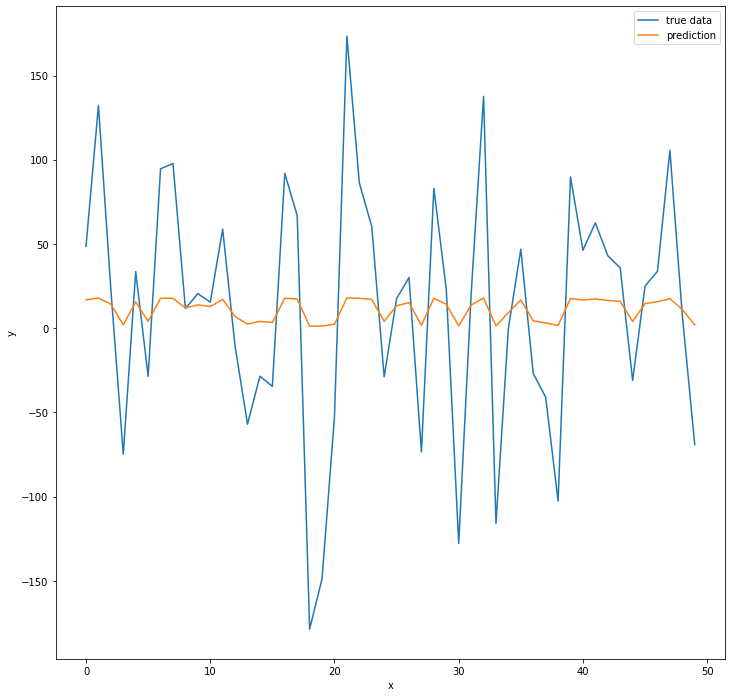

In [31]:

#define figure size
plt.figure(figsize=(12,12)) 
# plot true data
plt.plot(range(len(Y_test)), Y_test, label ='true data')
plt.plot(range(len(Y_test)), y_hat_test[0,:], label = 'prediction')
plt.xlabel("x")
plt.ylabel("y")

plt.legend()
plt.show()